In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import time

import models
import flows

In [2]:
# load the data. It may take a while
data = sio.loadmat("./data/data_120_10000.mat")

In [3]:
lamb = data["lamb"]
sols = data["sols"]
fs = data["fs"]
xx = data["xx"]
yy = data["yy"]
xi = data["xi"]

N = 10000
u_ref = sols[:N, ...]
f_ref = fs[:N, ...]
x_train = xx[::2, ::2].reshape([-1, 1])
y_train = yy[::2, ::2].reshape([-1, 1])
f_train = f_ref[:, ::2, ::2].reshape([N, -1])
f_train = f_train.T

In [4]:
mhpinn = models.MHPINN(
    num_tasks=N, dim=200, name="mhpinn6",
)
mhpinn.restore()

#### Normalizing flows

In [5]:
permutation = list(np.arange(101, 201, 1)) + list(np.arange(0, 101, 1))
nf = flows.MAF(
    dim=201,
    permutation=permutation,
    hidden_layers=[200, 200],
    num_bijectors=10,
    activation=tf.nn.relu,
    name="maf6",
)
data = mhpinn.heads.numpy()

In [6]:
loss = nf.train_batch(tf.constant(data.T, tf.float32), nepoch=500)

0 -413.3025
Elapsed:  11.379510879516602
1 -467.7279
Elapsed:  2.1315486431121826
2 -494.45975
Elapsed:  2.296510696411133
3 -515.964
Elapsed:  2.070739269256592
4 -521.9382
Elapsed:  2.1623568534851074
5 -530.1173
Elapsed:  2.2830145359039307
6 -545.6923
Elapsed:  2.184748649597168
7 -547.9992
Elapsed:  2.092965841293335
8 -563.816
Elapsed:  2.1041598320007324
9 -559.8611
Elapsed:  2.0413150787353516
10 -564.6459
Elapsed:  2.1309280395507812
11 -568.2009
Elapsed:  2.059701681137085
12 -567.8908
Elapsed:  2.126491069793701
13 -571.04803
Elapsed:  1.9794809818267822
14 -576.9104
Elapsed:  2.228029727935791
15 -589.1606
Elapsed:  2.2415597438812256
16 -573.5599
Elapsed:  2.0992813110351562
17 -585.9505
Elapsed:  1.939079761505127
18 -571.1747
Elapsed:  2.0533227920532227
19 -598.613
Elapsed:  2.2371535301208496
20 -581.7928
Elapsed:  2.033350944519043
21 -595.7306
Elapsed:  2.1144299507141113
22 -608.8362
Elapsed:  2.1796188354492188
23 -591.5231
Elapsed:  1.99654221534729
24 -609.47705


195 -658.9852
Elapsed:  1.9130992889404297
196 -671.7432
Elapsed:  2.1874020099639893
197 -671.9172
Elapsed:  2.0408856868743896
198 -672.4792
Elapsed:  2.1650960445404053
199 -664.4657
Elapsed:  1.9218790531158447
200 -668.3085
Elapsed:  1.9616432189941406
201 -670.45294
Elapsed:  2.035036325454712
202 -662.8748
Elapsed:  1.8433988094329834
203 -652.1766
Elapsed:  2.040560007095337
204 -669.1843
Elapsed:  2.1808505058288574
205 -678.9793
Elapsed:  2.1843175888061523
206 -666.71
Elapsed:  2.140730381011963
207 -671.6482
Elapsed:  2.1400656700134277
208 -656.7071
Elapsed:  2.04150128364563
209 -661.26996
Elapsed:  2.212287664413452
210 -670.1865
Elapsed:  2.7259137630462646
211 -664.5883
Elapsed:  2.371091365814209
212 -670.77997
Elapsed:  2.1599018573760986
213 -652.3626
Elapsed:  2.0861258506774902
214 -668.7288
Elapsed:  2.1256816387176514
215 -674.3502
Elapsed:  2.0326569080352783
216 -667.5384
Elapsed:  1.7723207473754883
217 -665.47644
Elapsed:  2.112133741378784
218 -676.5641
Ela

387 -683.0339
Elapsed:  1.3949358463287354
388 -675.6813
Elapsed:  1.3653607368469238
389 -684.5991
Elapsed:  1.3556911945343018
390 -680.9778
Elapsed:  1.2281830310821533
391 -691.9503
Elapsed:  1.3398265838623047
392 -690.315
Elapsed:  1.264404296875
393 -688.184
Elapsed:  1.2583916187286377
394 -672.5685
Elapsed:  1.2163043022155762
395 -682.8832
Elapsed:  1.3543171882629395
396 -665.1613
Elapsed:  1.264084815979004
397 -691.6088
Elapsed:  1.2802019119262695
398 -682.70026
Elapsed:  1.4732670783996582
399 -698.7645
Elapsed:  2.0671114921569824
400 -691.2008
Elapsed:  2.2373478412628174
401 -684.1971
Elapsed:  2.268035650253296
402 -695.8438
Elapsed:  2.1369385719299316
403 -688.0465
Elapsed:  2.2377007007598877
404 -694.1552
Elapsed:  2.2756571769714355
405 -689.7164
Elapsed:  2.2059903144836426
406 -686.43
Elapsed:  2.19635272026062
407 -694.5659
Elapsed:  2.2533481121063232
408 -688.9518
Elapsed:  2.2616264820098877
409 -693.0166
Elapsed:  2.1817212104797363
410 -673.7955
Elapsed:

In [6]:
# loss = nf.train_batch(tf.constant(data.T, tf.float32), nepoch=500)

0 -390.57755
Elapsed:  11.191023826599121
1 -440.6381
Elapsed:  1.7853801250457764
2 -470.19464
Elapsed:  1.7247791290283203
3 -485.7095
Elapsed:  1.7574641704559326
4 -502.90494
Elapsed:  1.7955470085144043
5 -490.8522
Elapsed:  1.715325117111206
6 -521.3628
Elapsed:  1.7990047931671143
7 -530.5952
Elapsed:  1.8690814971923828
8 -535.7463
Elapsed:  1.7179584503173828
9 -545.95044
Elapsed:  1.7452287673950195
10 -545.2719
Elapsed:  1.735785722732544
11 -553.0974
Elapsed:  1.892268419265747
12 -556.961
Elapsed:  2.2879323959350586
13 -526.1281
Elapsed:  2.1959128379821777
14 -558.62634
Elapsed:  1.7669148445129395
15 -570.0564
Elapsed:  1.88165283203125
16 -570.1218
Elapsed:  1.6507713794708252
17 -572.3372
Elapsed:  1.6938543319702148
18 -574.60535
Elapsed:  1.9320666790008545
19 -579.3832
Elapsed:  1.807671070098877
20 -583.1649
Elapsed:  1.8381855487823486
21 -580.74036
Elapsed:  1.7880804538726807
22 -590.2739
Elapsed:  1.8151066303253174
23 -591.5806
Elapsed:  1.981684684753418
24 

194 -639.17804
Elapsed:  2.0289306640625
195 -668.28723
Elapsed:  1.9210593700408936
196 -672.4852
Elapsed:  2.1946258544921875
197 -675.1864
Elapsed:  1.9489948749542236
198 -671.0517
Elapsed:  1.811063289642334
199 -646.8745
Elapsed:  1.8524060249328613
200 -619.7623
Elapsed:  1.7225673198699951
201 -661.3614
Elapsed:  1.8101081848144531
202 -674.738
Elapsed:  1.8594698905944824
203 -676.1507
Elapsed:  1.8185739517211914
204 -673.4236
Elapsed:  1.8892664909362793
205 -673.1536
Elapsed:  1.832690954208374
206 -668.936
Elapsed:  1.7393763065338135
207 -653.48193
Elapsed:  1.950791835784912
208 -661.5112
Elapsed:  1.8380787372589111
209 -636.3986
Elapsed:  1.853175163269043
210 -663.7171
Elapsed:  1.9237303733825684
211 -676.0113
Elapsed:  1.8606908321380615
212 -673.3079
Elapsed:  1.837486743927002
213 -669.40704
Elapsed:  1.7471263408660889
214 -664.7292
Elapsed:  1.712191104888916
215 -631.98267
Elapsed:  1.7983906269073486
216 -671.9757
Elapsed:  1.7017464637756348
217 -664.5143
Ela

386 -685.805
Elapsed:  1.6662650108337402
387 -672.0914
Elapsed:  1.863328456878662
388 -675.8016
Elapsed:  1.6614205837249756
389 -681.074
Elapsed:  1.7675437927246094
390 -679.0774
Elapsed:  1.8481481075286865
391 -674.9272
Elapsed:  1.730832815170288
392 -678.1235
Elapsed:  1.702415943145752
393 -682.8632
Elapsed:  1.8491706848144531
394 -684.8701
Elapsed:  1.9259719848632812
395 -668.7696
Elapsed:  1.7515077590942383
396 -620.8104
Elapsed:  1.8556675910949707
397 -665.7745
Elapsed:  1.8234279155731201
398 -674.11615
Elapsed:  1.9815168380737305
399 -687.9241
Elapsed:  1.8247127532958984
400 -676.5224
Elapsed:  1.8291397094726562
401 -685.069
Elapsed:  1.981384515762329
402 -685.23035
Elapsed:  1.7784113883972168
403 -680.7474
Elapsed:  1.8621394634246826
404 -681.1128
Elapsed:  2.1301257610321045
405 -683.8124
Elapsed:  1.8868374824523926
406 -681.275
Elapsed:  1.996391773223877
407 -684.3764
Elapsed:  1.930997610092163
408 -675.2457
Elapsed:  1.8224213123321533
409 -662.9761
Elaps

In [7]:
nf.restore()
samples = nf.sample(10000)
xx_test = tf.constant(xx.reshape([-1, 1]), tf.float32)
yy_test = tf.constant(yy.reshape([-1, 1]), tf.float32)

In [8]:
u_samples = mhpinn.call(
    xx_test, yy_test, tf.transpose(samples),
)
f_samples = mhpinn.pde(
    xx_test, yy_test, tf.transpose(samples),
)

In [9]:
u_samples = tf.reshape(u_samples, [101, 101, N])
f_samples = tf.reshape(f_samples, [101, 101, N])
u_samples = tf.transpose(u_samples, [2, 0, 1])
f_samples = tf.transpose(f_samples, [2, 0, 1])

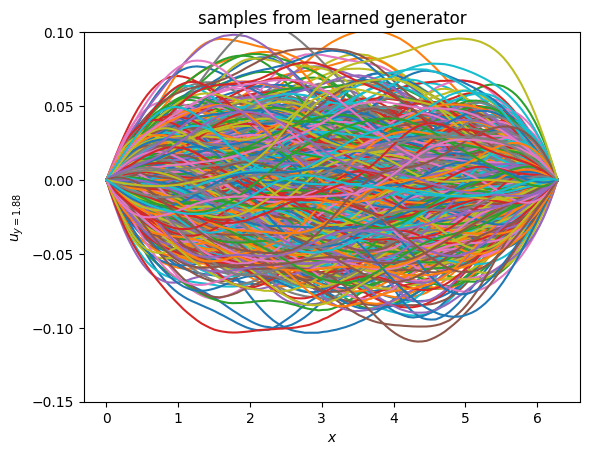

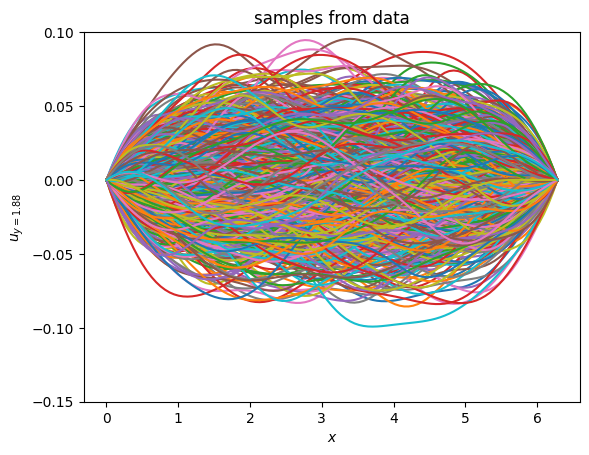

In [10]:
plt.figure(dpi=100)
for i in range(1000):
    plt.plot(xx[30, :], u_samples[i, 30, :])
plt.ylim([-0.15, 0.1])
plt.title("samples from learned generator")
plt.ylabel("$u_{y=1.88}$")
plt.xlabel("$x$")
plt.savefig("u_generative.png")

plt.figure(dpi=100)
for i in range(1000):
    plt.plot(xx[30, :], u_ref[i, 30, :])
plt.ylim([-0.15, 0.1])
plt.title("samples from data")
plt.ylabel("$u_{y=1.88}$")
plt.xlabel("$x$")
plt.savefig("u_training.png")

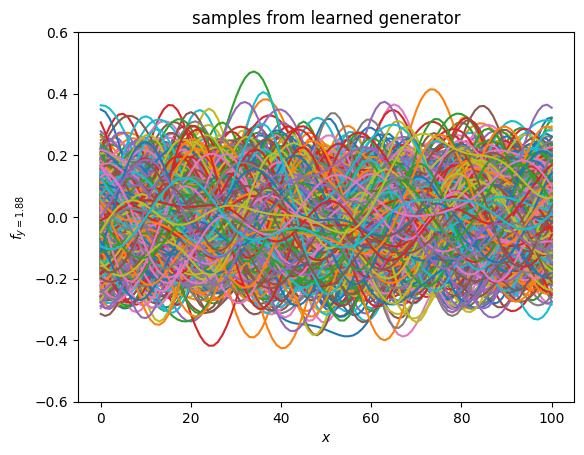

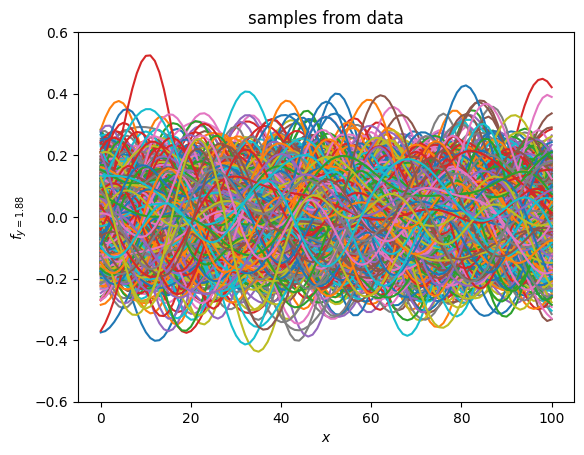

In [11]:
plt.figure(dpi=100)
for i in range(1000):
    plt.plot(f_samples[i, 50, :])
plt.ylim([-0.6, 0.6])
plt.title("samples from learned generator")
plt.ylabel("$f_{y=1.88}$")
plt.xlabel("$x$")
plt.savefig("f_generative.png")

plt.figure(dpi=100)
for i in range(1000):
    plt.plot(f_ref[i, 50, :])
plt.ylim([-0.6, 0.6])
plt.title("samples from data")
plt.ylabel("$f_{y=1.88}$")
plt.xlabel("$x$")
plt.savefig("f_training.png")

In [12]:
mu = np.mean(f_samples, axis=0)
sd = np.std(f_samples, axis=0)
mu_ref = np.mean(f_ref, axis=0)
sd_ref = np.std(f_ref, axis=0)

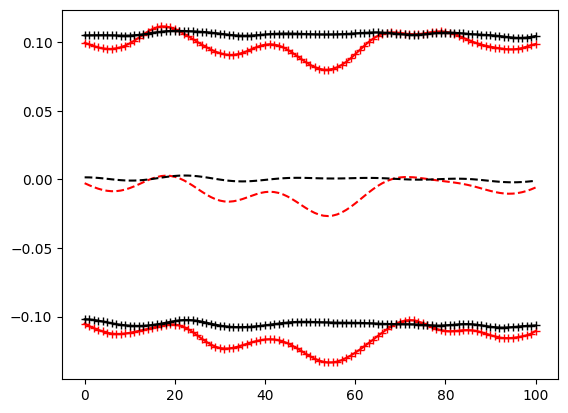

In [14]:
j = 50
plt.plot(mu[:, j], "r--")
plt.plot((mu + sd)[:, j], "r-+")
plt.plot((mu - sd)[:, j], "r-+")
plt.plot(mu_ref[:, j], "k--")
plt.plot((mu_ref + sd_ref)[:, j], "k-+")
plt.plot((mu_ref - sd_ref)[:, j], "k-+")
plt.show()

In [12]:
f_ref.shape

(10000, 101, 101)